<img src='https://repository-images.githubusercontent.com/121802384/c355bb80-7d42-11e9-9e0e-4729609f9fbc' alt='WRF-Hydro Logo' width="15%"/>

# Lesson 7 - Exploring gridded and NWM configurations

## Overview
In this lesson we compare the differences between a gridded channel routing simulation and a cutout from the National Water Model (NWM) which uses a different channel routing method and has some differences in model physics and parameters.  

### Creating the simulation directory and running a baseline WRF-Hydro simulation
Below are the commands from lesson 2 to create the simulation direcory and run a WRF-Hydro simulation. This simulation will be run exactly as was done in Lesson 2 and will serve as our baseline simulation. We will modify run-time options in subsequent simulations in the lesson and compare the outputs.  

**Note that we are skipping the compile step here, and using the binary from lesson 2.**

In [1]:
%%bash

# Make a new directory for our baseline simulation
rm -rf ~/wrf-hydro-training/output/lesson7/run_gridded_baseline
mkdir -p ~/wrf-hydro-training/output/lesson7/run_gridded_baseline

# Copy our model files to the simulation directory from lesson 2
cp ~/wrf-hydro-training/wrf_hydro_nwm_public/build/Run/*.TBL \
  ~/wrf-hydro-training/output/lesson7/run_gridded_baseline
cp ~/wrf-hydro-training/wrf_hydro_nwm_public/build/Run/wrf_hydro \
  ~/wrf-hydro-training/output/lesson7/run_gridded_baseline

# Create symbolic links to large domain files
cp -as $HOME/wrf-hydro-training/example_case/FORCING \
  ~/wrf-hydro-training/output/lesson7/run_gridded_baseline
cp -as $HOME/wrf-hydro-training/example_case/Gridded/DOMAIN \
  ~/wrf-hydro-training/output/lesson7/run_gridded_baseline
cp -as $HOME/wrf-hydro-training/example_case/Gridded/RESTART \
  ~/wrf-hydro-training/output/lesson7/run_gridded_baseline

# Copy namelist files
cp ~/wrf-hydro-training/example_case/Gridded/namelist.hrldas \
  ~/wrf-hydro-training/output/lesson7/run_gridded_baseline
cp ~/wrf-hydro-training/example_case/Gridded/hydro.namelist \
  ~/wrf-hydro-training/output/lesson7/run_gridded_baseline

## National Water Model configuration (NWM)
In this section we will discuss the differences between the National Water Model (NWM) configuration and the baseline Gridded configuration. Afterwards, we will run a NWM simulation and visualize some of the differences. 

### Create a NWM simulation directory

In [2]:
%%bash

# Make a new directory for our baseline simulation
rm -rf ~/wrf-hydro-training/output/lesson7/run_nwm
mkdir -p ~/wrf-hydro-training/output/lesson7/run_nwm

# Copy our model files to the simulation directory from lesson 2
cp ~/wrf-hydro-training/wrf_hydro_nwm_public/build/Run/*.TBL \
  ~/wrf-hydro-training/output/lesson7/run_nwm
cp ~/wrf-hydro-training/wrf_hydro_nwm_public/build/Run/wrf_hydro \
  ~/wrf-hydro-training/output/lesson7/run_nwm

# Create symbolic links to large domain files
cp -as $HOME/wrf-hydro-training/example_case/FORCING \
  ~/wrf-hydro-training/output/lesson7/run_nwm
cp -as $HOME/wrf-hydro-training/example_case/NWM/DOMAIN \
  ~/wrf-hydro-training/output/lesson7/run_nwm
cp -as $HOME/wrf-hydro-training/example_case/NWM/RESTART \
  ~/wrf-hydro-training/output/lesson7/run_nwm

# Copy namelist files
cp ~/wrf-hydro-training/example_case/NWM/namelist.hrldas \
  ~/wrf-hydro-training/output/lesson7/run_nwm
cp ~/wrf-hydro-training/example_case/NWM/hydro.namelist \
  ~/wrf-hydro-training/output/lesson7/run_nwm

### Compare the contents of the NWM simulation directory to the Gridded simulation directory
In this section we will compare the files in the NWM simulation directory to those in the Gridded simulation directory.

**View the contents of the NWM simulation directory**

In [3]:
%%bash
ls ~/wrf-hydro-training/output/lesson7/run_nwm

CHANPARM.TBL
DOMAIN
FORCING
GENPARM.TBL
HYDRO.TBL
MPTABLE.TBL
RESTART
SOILPARM.TBL
hydro.namelist
na

melist.hrldas
wrf_hydro


**View the contents of the Gridded simulation directory**

In [4]:
%%bash
ls ~/wrf-hydro-training/output/lesson7/run_gridded_baseline

CHANPARM.TBL
DOMAIN
FORCING
GENPARM.TBL
HYDRO.TBL
MPTABLE.TBL
RESTART
SOILPARM.TBL
hydro.namelist
na

melist.hrldas
wrf_hydro


Here we can see that at the top level the directories contents look the same. However, there are differences in the *DOMAIN* and *RESTART* directories.

**View the contents of the *NWM/DOMAIN* directory**

In [5]:
%%bash
ls ~/wrf-hydro-training/output/lesson7/run_nwm/DOMAIN

Fulldom_hires.nc
GEOGRID_LDASOUT_Spatial_Metadata.nc
GWBUCKPARM.nc
LAKEPARM.nc
Route_Link.nc
geo_em.

d01.nc
hydro2dtbl.nc
soil_properties.nc
spatialweights.nc
wrfinput_d01.nc


**View the contents of the *Gridded/DOMAIN* directory**

In [6]:
%%bash
ls ~/wrf-hydro-training/output/lesson7/run_gridded_baseline/DOMAIN

Fulldom_hires.nc
GEOGRID_LDASOUT_Spatial_Metadata.nc
GWBASINS.nc
GWBUCKPARM.nc
LAKEPARM.nc
geo_em.d0

1.nc
hydro2dtbl.nc
lake_shapes
soil_properties.nc
wrfinput_d01.nc


**Explore the differences**

Note the file differences in the *NWM* directory compared to the *Gridded* directory. Below is a table of these files and descriptions.

| Filename | Description | Source | Required |
| ------------- | ------------- | ------------- | ------------- |
| GWBASINS.nc | 2D file defining the locations of groundwater basins | pre-processing| Required for gridded when the baseflow bucket model is turned on and user defined mapping is off |
|Route_Link.nc | Channel reach parameters (contains ComID,gage ID & channel params) | pre-processing | Required if reach based routing is used (including user defined mapping) |
|nudgingParams.nc| Parameters used for data assimilation streamflow nudging | user defined | No, and not available for gridded |
| spatialweights.nc | Spatial weight file used to map fluxes to catchment objects | distributed with NWM domain files | When using user defined mapping |


**NOTE: We can ignore the *Gridded/lake_shapes* directory, it simply contains geospatial data used for creating the domain**

### Explore the namelist differences between the NWM and Gridded configurations
In this section we will explore the namelists differences between the NWM and Gridded configurations

**View the difference between *NWM* namelist.hrldas and *Gridded* namelist.hrldas**

In [7]:
%%bash
diff ~/wrf-hydro-training/output/lesson7/run_nwm/namelist.hrldas ~/wrf-hydro-training/output/lesson7/run_gridded_baseline/namelist.hrldas || true

24c24
< RUNOFF_OPTION                     = 7
---
> RUNOFF_OPTION                     = 3
29c29
< SN

OW_ALBEDO_OPTION                = 1
---
> SNOW_ALBEDO_OPTION                = 2
35c35
< IMPERV_OPTIO

N                     = 2  !(0->none; 1->total; 2->Alley&Veenhuis; 9->orig)
---
> IMPERV_OPTION     

                = 9  !(0->none; 1->total; 2->Alley&Veenhuis; 9->orig)
93d92
< 


**View the difference between *NWM* hydro.namelist and *Gridded* hydro.namelist**

In [8]:
%%bash
diff ~/wrf-hydro-training/output/lesson7/run_nwm/hydro.namelist ~/wrf-hydro-training/output/lesson7/run_gridded_baseline/hydro.namelist || true

65c65
< ! 1 = with scale/offset/compression, ! 2 = with scale/offset/NO compression,
---
> ! 1 = wit

h scale/offset/compression, ! 2 = with scale/offset/NO compression, 
82c82
< output_channelBucket_in

flux = 2
---
> output_channelBucket_influx = 0
89c89
< CHRTOUT_GRID = 0             ! Netcdf grid of

 channel streamflow values (2d)
---
> CHRTOUT_GRID = 1             ! Netcdf grid of channel streamfl

ow values (2d)
122c122
< DTRT_CH = 300
---
> DTRT_CH = 10
138c138
< imperv_adj = 1
---
> imperv_adj 

= 0
144c144
< channel_option = 2
---
> channel_option = 3
147c147
< route_link_f = "./DOMAIN/Route_L

ink.nc"
---
> !route_link_f = ""
151c151
< compound_channel = .TRUE.
---
> compound_channel = .FALSE

.
162c162,166
< GWBASESWCRT = 4
---
> GWBASESWCRT = 1
> 
> ! Switch to activate bucket model loss (0

=no, 1=yes)
> ! This option is currently only supported if using reach-based routing with UDMP=1.
> 

bucket_loss = 0
166c170
< !gwbasmskfil = "./DOMAIN/GWBASINS.nc"
---
> gwbasmskfil = "./DOMAIN/GWBASI

NS.nc"
172c176
< UDMP_OPT = 1
---
> UDMP_OPT = 0
175c179
< udmap_file = "./DOMAIN/spatialweights.nc"


---
> !udmap_file = ""
181,233d184
< ! Path to the "timeslice" observation files.
< timeSlicePath =

 "./nudgingTimeSliceObs/"
< 
< nudgingParamFile = "./DOMAIN/nudgingParams.nc"
< 
< ! Nudging restart

 file = "nudgingLastObsFile"
< ! nudgingLastObsFile defaults to '', which will look for nudgingLastO

bs.YYYY-mm-dd_HH:MM:SS.nc
< !   **AT THE INITALIZATION TIME OF THE RUN**. Set to a missing file to u

se no restart.
< !nudgingLastObsFile = '/a/nonexistent/file/gives/nudging/cold/start'
< 
< !! Parall

el input of nudging timeslice observation files?
< readTimesliceParallel = .TRUE.
< 
< ! temporalPer

sistence defaults to true, only runs if necessary params present.
< temporalPersistence = .TRUE.
< 


< ! The total number of last (obs, modeled) pairs to save in nudgingLastObs for
< ! removal of bias.

 This is the maximum array length. (This option is active when persistBias=FALSE)
< ! (Default=960=1

0days @15min obs resolution, if all the obs are present and longer if not.)
< nLastObs = 480
< 
< ! 

If using temporalPersistence the last observation persists by default.
< ! This option instead persi

sts the bias after the last observation.
< persistBias = .TRUE.
< 
< ! AnA (FALSE)  vs Forecast (TRU

E) bias persistence.
< ! If persistBias: Does the window for calculating the bias end at
< ! model i

nit time (=t0)?
< ! FALSE = window ends at model time (moving),
< ! TRUE = window ends at init=t0(fc

st) time.
< ! (If commented out, Default=FALSE)
< ! Note: Perfect restart tests require this option 

to be .FALSE.
< biasWindowBeforeT0 = .FALSE.
< 
< ! If persistBias: Only use this many last (obs, mo

deled) pairs. (If Commented out, Default=-1*nLastObs)
< ! > 0: apply an age-based filter, units=hour

s.
< ! = 0: apply no additional filter, use all available/usable obs.
< ! < 0: apply an count-based 

filter, units=count
< maxAgePairsBiasPersist = 3
< 
< ! If persistBias: The minimum number of last (

obs, modeled) pairs, with age less than
< ! maxAgePairsBiasPersist, required to apply a bias correct

ion. (default=8)
< minNumPairsBiasPersist = 1
< 
< ! If persistBias: give more weight to observation

s closer in time? (default=FALSE)
< invDistTimeWeightBias = .TRUE.
< 
< ! If persistBias: "No constr

uctive interference in bias correction?", Reduce the bias adjustment
< ! when the model and the bias

 adjustment have the same sign relative to the modeled flow at t0?
< ! (default=FALSE)
< ! Note: Per

fect restart tests require this option to be .FALSE.
< noConstInterfBias = .TRUE.
< 
235d185
< 


### Run the default Gridded and NWM simulations
In this section we will run default simulations for the NWM and Gridded configurations using our prepared simulation directories. 

**Step 1: Run the NWM simulation**

In [9]:
%%bash
# Run the simulation
cd ~/wrf-hydro-training/output/lesson7/run_nwm
mpirun -np 2 ./wrf_hydro &> run.log

In [10]:
%%bash
# Check that it finished successfully
tail -1 ~/wrf-hydro-training/output/lesson7/run_nwm/diag_hydro.00000

 The model finished successfully.......


**Step 2: Run the gridded simulation**

In [11]:
%%bash
# Run the simulation
cd ~/wrf-hydro-training/output/lesson7/run_gridded_baseline
mpirun -np 2 ./wrf_hydro &> run.log

In [12]:
%%bash
# Check that it finished successfully
tail -1 ~/wrf-hydro-training/output/lesson7/run_gridded_baseline/diag_hydro.00000

 The model finished successfully.......


### View the hydrographs
**Load the xarray python package**

In [13]:
# Load the xarray package
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

xr.set_options(display_style="html")
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

**Load the CHANOBS streamflow datasets**

We are going to use the CHANOBS files because it will limit the number of grid cells to only those which we have specified have a gage.

In [14]:
chanobs_gridded = xr.open_mfdataset('/home/docker/wrf-hydro-training/output/lesson7/run_gridded_baseline/*CHANOBS*',
                            combine='by_coords')
chanobs_nwm = xr.open_mfdataset('/home/docker/wrf-hydro-training/output/lesson7/run_nwm/*CHANOBS*',
                            combine='by_coords')
obs = pd.read_csv('/home/docker/wrf-hydro-training/example_case/USGS_obs.csv',dtype=str)
obs['dateTime'] = pd.to_datetime(obs['dateTime'])
obs['streamflow_cms'] = pd.to_numeric(obs['streamflow_cms'])

**Plot the hydrographs**

**Table 1. USGS Stream Gage IDs and associated WRF-Hydro feature_id indices.**

|USGS Gage ID|WRF-Hydro gage feature_id|NWM ComID|Gage Information|
|------|:-:|---|---|
| 01374559 | 1 |6226964|https://waterdata.usgs.gov/pa/nwis/uv/?site_no=01374559|
| 01447720 | 2 |6227008|https://waterdata.usgs.gov/nwis/nwismap/?site_no=01447720|

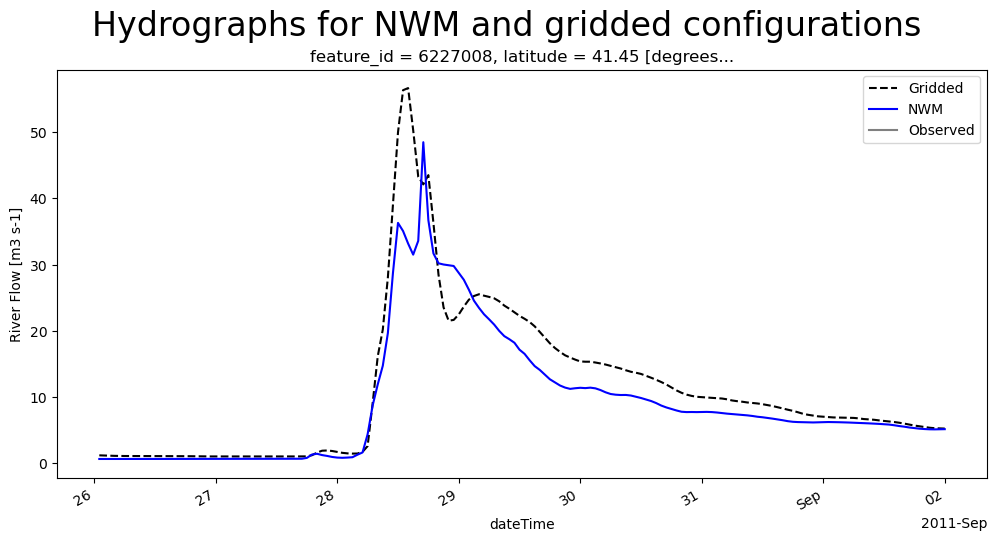

In [15]:
fig, axes = plt.subplots(ncols=1,figsize=(12, 6))
plt.suptitle('Hydrographs for NWM and gridded configurations',fontsize=24)
chanobs_gridded.sel(feature_id = 2).streamflow.plot(label='Gridded',
                                                     color='black',
                                                     linestyle='--')
chanobs_nwm.sel(feature_id = 6227008).streamflow.plot(label='NWM',
                                                        color='blue',
                                                        linestyle='-')
obs[obs['site_no'] == '01447720'].plot(x='dateTime',
                                       y='streamflow_cms',
                                       ax=axes,
                                       label='Observed',
                                       color='grey')
plt.legend()
plt.show()

## Summary
The gridded default simulation more closely resembles the observations for the Irene event in the upstream catchment than the NWM default simulation.  The differences are wrapped up in several aspects: 
1. The NWM has been calibrated to fit various USGS headwater stream gauges.
2. The geogrids for NWM and gridded are different, resulting in differences in some default geogrid parameters
3. Fundamental differences in channel physics
4. NWM undergoes a mapping process to transfer fluxes between the grids to the vector network (the spatial weights), whereas the gridded configuration has a 1:1 mapping. 

### If time permits...
View the *CHANNELGRID* variable from each `Fulldom_hires.nc` file for the NWM and Gridded domains using xarray.

Note the differences and be ready to discuss.

# Congratulations!
This concludes lesson 7, our last hands on experiment.  

© UCAR 2025